In [1]:
!pip install config
!pip install pytorch_lightning
!pip install timm
!pip install quantimpy
!pip install trackpy
!pip install porespy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 584 kB 5.0 MB/s 
     |████████████████████████████████| 409 kB 44.5 MB/s 
     |████████████████████████████████| 596 kB 47.4 MB/s 
     |████████████████████████████████| 140 kB 45.2 MB/s 
     |████████████████████████████████| 1.1 MB 40.6 MB/s 
     |████████████████████████████████| 271 kB 44.4 MB/s 
     |████████████████████████████████| 94 kB 2.5 MB/s 
     |████████████████████████████████| 144 kB 12.1 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 431 kB 4.5 MB/s 
Looking in indexes: https://pypi.org

In [2]:
%load_ext autoreload
%autoreload 2
import gdown
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
import os
from PIL import Image
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision
import seaborn as sns
import config
import torchvision.transforms
from mpl_toolkits.mplot3d import Axes3D

from quantimpy import minkowski
from skimage.segmentation import random_walker
from tqdm import tqdm
from scipy import stats
import trackpy as tp
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Final_project/code')
sys.path.insert(0,'/content/drive/MyDrive/Final_project/data')

In [5]:
from train import GAN
from utils import GanDataset

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/15Vsq9xh0VNwDjhFqhG0SW0t2aGjhcdU7

In [7]:
#checkpoint_file = '/content/drive/MyDrive/Final_project/data/standard_loss_zone_0_1_3_5_additional_training.ckpt'
checkpoint_file = '/content/drive/MyDrive/Final_project/data/standard_loss_zone_0_1_3_5_mse_from_beggining_effnetb3_encoder_add_add_training.ckpt'

In [9]:
dataset_test = np.load('/content/DL_project_dataset/dataset_test.npy')

In [10]:
dataset_train = np.load('/content/DL_project_dataset/dataset_train.npy')

In [11]:
model = GAN( train_data_path= '/content/DL_project_dataset/dataset_test.npy',
            valid_data_path = '/content/DL_project_dataset/dataset_train.npy',
            gan_type = 'dcgan',
            loss_type = 'standard')

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b3_ra2-cf984f9c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_ra2-cf984f9c.pth


In [12]:
checkpoint = torch.load(checkpoint_file)

In [13]:
checkpoint['state_dict'].keys()

odict_keys(['encoder.conv_stem.weight', 'encoder.bn1.weight', 'encoder.bn1.bias', 'encoder.bn1.running_mean', 'encoder.bn1.running_var', 'encoder.bn1.num_batches_tracked', 'encoder.blocks.0.0.conv_dw.weight', 'encoder.blocks.0.0.bn1.weight', 'encoder.blocks.0.0.bn1.bias', 'encoder.blocks.0.0.bn1.running_mean', 'encoder.blocks.0.0.bn1.running_var', 'encoder.blocks.0.0.bn1.num_batches_tracked', 'encoder.blocks.0.0.se.conv_reduce.weight', 'encoder.blocks.0.0.se.conv_reduce.bias', 'encoder.blocks.0.0.se.conv_expand.weight', 'encoder.blocks.0.0.se.conv_expand.bias', 'encoder.blocks.0.0.conv_pw.weight', 'encoder.blocks.0.0.bn2.weight', 'encoder.blocks.0.0.bn2.bias', 'encoder.blocks.0.0.bn2.running_mean', 'encoder.blocks.0.0.bn2.running_var', 'encoder.blocks.0.0.bn2.num_batches_tracked', 'encoder.blocks.0.1.conv_dw.weight', 'encoder.blocks.0.1.bn1.weight', 'encoder.blocks.0.1.bn1.bias', 'encoder.blocks.0.1.bn1.running_mean', 'encoder.blocks.0.1.bn1.running_var', 'encoder.blocks.0.1.bn1.num_ba

In [14]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [15]:
gan = GAN.load_from_checkpoint(checkpoint_file,
                          train_data_path = '/content/DL_project_dataset/dataset_test.npy', 
                          valid_data_path = '/content/DL_project_dataset/dataset_train.npy',
                          batch_size=6, 
                          loss_type='standard', 
                       )

In [16]:
valid_dataset = GanDataset(dataset_test, None)

In [17]:
val = DataLoader(valid_dataset, num_workers=8, batch_size=28, shuffle=False)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [18]:
i = iter(val)
exampl = next(i)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [19]:
exampl[0].shape

torch.Size([28, 1, 64, 64, 64])

In [20]:
res = gan.validation_step(exampl,1)

In [21]:
res['fake_images'].shape

torch.Size([28, 1, 64, 64, 64])

In [22]:
res_numpy = res['fake_images'].cpu().detach().numpy()

In [23]:
res_numpy = res_numpy.squeeze(axis=1)
#res_numpy = res_numpy.squeeze(axis=0)

In [24]:
res_numpy = res_numpy*0.12 +0.52

In [25]:
res_numpy = res_numpy*255

# Thresholding

In [26]:
# Алгоритм денозийнга одного слайса
def denoise(img):
    # Bandpass фильтр
    x = tp.preprocessing.bandpass(img, 0, 17, threshold=-151, truncate=-10)
    # Нормализация
    out = (x - x.min()) / (x.max() - x.min())
    out = 255 * out
    out = np.uint8(out)
    # Non local mean фильтр
    out = non_local_means(out, h=20) 
    return out

In [27]:
# Функция денойзинга. Выполняется для каждого из 3х направлений по-отдельности
def denoising_3d(img3d, mode):
    out3d = np.empty(img3d.shape)
    a, b, c = out3d.shape
    if mode == "y":
        for i in range(a):
            out = denoise(img3d[i,:,:])
            out3d[i,:,:] = out
    elif mode == "x":
        for i in range(b):
            out = denoise(img3d[:,i,:])
            out3d[:,i,:] = out
    elif mode == "z":
        for i in range(c):
            out = denoise(img3d[:,:,i])
            out3d[:,:,i] = out
            
    return out3d

In [28]:

#### Non-local means алгоритм
def non_local_means(image, h=50):
    return cv2.fastNlMeansDenoising(image, h=h)

### Бинаризация

#### Нормализация от 0 до 1
def change_range(image):
    vmin, vmax = stats.scoreatpercentile(image, (.1, 99))
    A = np.clip(image, vmin, vmax)
    A = (A - vmin) / (vmax - vmin)
    return A

#### Маска для алгоритма Randow walker
def create_markers(image, pores, solid):
    markers = np.zeros(image.shape)
    markers[image < pores] = 1
    markers[image > solid] = 2
    return markers

#### Random walker 
def r_walker(image, markers):
    return random_walker(image, markers, beta=10, mode='bf')

#### Объединение двух вышестоящих функций
def r_walker2(image, pores, solid):
    vmin, vmax = stats.scoreatpercentile(image, (.1, 99))
    A = np.clip(image, vmin, vmax)
    A = (A - vmin) / (vmax - vmin)
    markers = np.zeros(A.shape)
    markers[A < pores] = 1
    markers[A > solid] = 2
    return random_walker(image, markers, beta=10, mode='bf', tol=0.0001)

In [29]:
# Алгоритм бинаризации
def binarize(img):
    # Делаем значения от 0 до 1
    img = change_range(img)
    # Берем среднее и отклонение из распределения пикселей
    # Для каждого снимка это распределение будет уникальным
    # Так что для каждого слайса эти значения будут отличаться
    mean = stats.describe(img.flatten())[2]
    var = stats.describe(img.flatten())[3]
    k = mean / var * 0.001 
    x = mean - k / 3   
    y = mean  
    # Припишем значения для пор и непроницаемой среды
    pores_value = x
    solid_value = y
    # Используя алгоритм Random Walker произведем бинаризацию
    markers = create_markers(img, pores=pores_value, solid=solid_value)
    output = r_walker(img, markers)
    output_markers = np.zeros(output.shape)
    output_markers[output == 2] = 255
    return output_markers

In [30]:
# Бинаризация по каждому из направлений
def binarization_3d(img3d, direction):
    a, b, c = img3d.shape
    bin3d = np.empty(img3d.shape)
    
    if direction == "z":
        for i in tqdm(range(c)):
            img = img3d[:,:,i]
            output_markers = binarize(img)
            bin3d[:,:,i] = output_markers
            
    elif direction == "y":
        for i in tqdm(range(a)):
            img = img3d[i,:,:]
            output_markers = binarize(img)
            bin3d[i,:,:] = output_markers
            
    elif direction == "x":
        for i in tqdm(range(b)):
            img = img3d[:,i,:]
            output_markers = binarize(img)
            bin3d[:,i,:] = output_markers
            
    return bin3d

In [31]:
def full_preprocessing(img3d):
  # Запустите алгоритмы денойзинга
  fibsem_3d_after_denoising_y = denoising_3d(img3d, mode="y")
  fibsem_3d_after_denoising_x = denoising_3d(img3d, mode="x")
  fibsem_3d_after_denoising_z = denoising_3d(img3d, mode="z")

  
  fibsem_binarized_z = binarization_3d(fibsem_3d_after_denoising_z, direction="z")
  fibsem_binarized_y = binarization_3d(fibsem_3d_after_denoising_y, direction="y")
  fibsem_binarized_x = binarization_3d(fibsem_3d_after_denoising_x, direction="x")
  fib = np.stack([
    fibsem_binarized_y,
    fibsem_binarized_x,
    fibsem_binarized_z
])

  fib = np.median(fib, axis=0)
  fib = np.uint8(fib)
  print(f"Проверяем размерность модели: {fib.shape}")
  return fib




In [32]:
dataset_test_bin = np.zeros_like(dataset_test)
res_numpy_bin = np.zeros_like(dataset_test)

In [33]:
for i in range(0,len(dataset_test)):
  dataset_test_bin[i] = full_preprocessing(dataset_test[i])


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 23%|██▎       | 15/64 [00:00<00:00, 143.28it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 47%|████▋     | 30/64 [00:00<00:00, 146.52it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_

Проверяем размерность модели: (64, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 98.47it/s]


Проверяем размерность модели: (64, 64, 64)


 12%|█▎        | 8/64 [00:00<00:00, 78.90it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 22%|██▏       | 14/64 [00:00<00:00, 139.53it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
100%|██████████| 64/64 [00:00<00:00, 135.77it/s]


Проверяем размерность модели: (64, 64, 64)


 44%|████▍     | 28/64 [00:00<00:00, 85.28it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 33%|███▎      | 21/64 [00:00<00:00, 100.45it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(l

Проверяем размерность модели: (64, 64, 64)


 70%|███████   | 45/64 [00:00<00:00, 134.84it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
100%|██████████| 64/64 [00:00<00:00, 124.02it/s]


Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
100%|██████████| 64/64 [00:00<00:00, 105.54it/s]


Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 22%|██▏       | 14/64 [00:00<00:00, 137.14it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 44%|████▍     | 28/64 [00:00<00:00, 130.32it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_

Проверяем размерность модели: (64, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 117.93it/s]


Проверяем размерность модели: (64, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 106.95it/s]


Проверяем размерность модели: (64, 64, 64)


 45%|████▌     | 29/64 [00:00<00:00, 96.86it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
100%|██████████| 64/64 [00:00<00:00, 91.97it/s]


Проверяем размерность модели: (64, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 95.51it/s]


Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
100%|██████████| 64/64 [00:00<00:00, 93.66it/s]


Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/seg

Проверяем размерность модели: (64, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 103.33it/s]


Проверяем размерность модели: (64, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 92.35it/s]


Проверяем размерность модели: (64, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 118.63it/s]


Проверяем размерность модели: (64, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 98.59it/s]


Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
100%|██████████| 64/64 [00:00<00:00, 97.17it/s]


Проверяем размерность модели: (64, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 78.70it/s]


Проверяем размерность модели: (64, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 106.57it/s]


Проверяем размерность модели: (64, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 117.63it/s]


Проверяем размерность модели: (64, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 111.02it/s]


Проверяем размерность модели: (64, 64, 64)


 56%|█████▋    | 36/64 [00:00<00:00, 82.30it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 28%|██▊       | 18/64 [00:00<00:00, 84.27it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(la

Проверяем размерность модели: (64, 64, 64)


 66%|██████▌   | 42/64 [00:00<00:00, 96.39it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 33%|███▎      | 21/64 [00:00<00:00, 102.71it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
100%|██████████| 64/64 [00:00<00:00, 115.71it/s]


Проверяем размерность модели: (64, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 141.86it/s]


Проверяем размерность модели: (64, 64, 64)


 16%|█▌        | 10/64 [00:00<00:00, 99.91it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
100%|██████████| 64/64 [00:00<00:00, 97.69it/s] 


Проверяем размерность модели: (64, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 90.38it/s]


Проверяем размерность модели: (64, 64, 64)


 38%|███▊      | 24/64 [00:00<00:00, 60.17it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
100%|██████████| 64/64 [00:00<00:00, 69.58it/s]


Проверяем размерность модели: (64, 64, 64)


In [34]:
for i in range(0,len(dataset_test)):
  res_numpy_bin[i] = full_preprocessing(res_numpy[i])

100%|██████████| 64/64 [00:00<00:00, 136.18it/s]


Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 50%|█████     | 32/64 [00:00<00:00, 152.47it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, iso

Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 25%|██▌       | 16/64 [00:00<00:00, 151.93it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/u

Проверяем размерность модели: (64, 64, 64)


 25%|██▌       | 16/64 [00:00<00:00, 151.71it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 50%|█████     | 32/64 [00:00<00:00, 143.53it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 20%|██        | 13/64 [00:00<00:00, 124.67it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds

Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 53%|█████▎    | 34/64 [00:00<00:00, 142.87it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 7

Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 28%|██▊       | 18/64 [00:00<00:00, 175.23it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 5

Проверяем размерность модели: (64, 64, 64)


 23%|██▎       | 15/64 [00:00<00:01, 34.67it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 33%|███▎      | 21/64 [00:00<00:01, 40.08it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 75%|███████▌  | 48/64 [00:01<00:00, 48.38it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_is

Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 28%|██▊       | 18/64 [00:00<00:00, 174.67it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/u

Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 25%|██▌       | 16/64 [00:00<00:00, 158.63it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 73%|███████▎  | 47/64 [00:00<00:00, 132.49it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_

Проверяем размерность модели: (64, 64, 64)


 22%|██▏       | 14/64 [00:00<00:00, 131.18it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
100%|██████████| 64/64 [00:00<00:00, 137.67it/s]


Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 27%|██▋       | 17/64 [00:00<00:00, 161.71it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 5

Проверяем размерность модели: (64, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 133.73it/s]


Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/seg

Проверяем размерность модели: (64, 64, 64)


 23%|██▎       | 15/64 [00:00<00:00, 141.21it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 47%|████▋     | 30/64 [00:00<00:00, 139.34it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_

Проверяем размерность модели: (64, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 140.94it/s]


Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 27%|██▋       | 17/64 [00:00<00:00, 168.80it/s]/u

Проверяем размерность модели: (64, 64, 64)


 23%|██▎       | 15/64 [00:00<00:00, 144.60it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 70%|███████   | 45/64 [00:00<00:00, 140.67it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_

Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 28%|██▊       | 18/64 [00:00<00:00, 169.84it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/u

Проверяем размерность модели: (64, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 129.44it/s]


Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
100%|██████████| 64/64 [00:00<00:00, 100.61it/s]


Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 53%|█████▎    | 34/64 [00:00<00:00, 147.41it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, iso

Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 22%|██▏       | 14/64 [00:00<00:00, 134.58it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 66%|██████▌   | 42/64 [00:00<00:00, 126.51it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_

Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 22%|██▏       | 14/64 [00:00<00:00, 137.50it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 4

Проверяем размерность модели: (64, 64, 64)


  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
  0%|          | 0/64 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 41%|████      | 26/64 [00:00<00:00, 129.32it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, iso

Проверяем размерность модели: (64, 64, 64)


100%|██████████| 64/64 [00:00<00:00, 135.54it/s]


Проверяем размерность модели: (64, 64, 64)


 23%|██▎       | 15/64 [00:00<00:00, 148.02it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 75%|███████▌  | 48/64 [00:00<00:00, 147.18it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(

Проверяем размерность модели: (64, 64, 64)


 47%|████▋     | 30/64 [00:00<00:00, 146.46it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 73%|███████▎  | 47/64 [00:00<00:00, 156.90it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(

Проверяем размерность модели: (64, 64, 64)


 50%|█████     | 32/64 [00:00<00:00, 148.43it/s]/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)
 77%|███████▋  | 49/64 [00:00<00:00, 155

Проверяем размерность модели: (64, 64, 64)


In [35]:

# porosity calculation
def porosity_calc(arr,min_thresh=100,max_thresh=255,thresholding = False):
  if thresholding:
    ret,arr = cv2.threshold(arr,min_thresh,max_thresh,cv2.THRESH_BINARY_INV)
  por = cv2.countNonZero(arr)/(arr.shape[0]*arr.shape[1])

  return por


In [36]:
def test_por(dataset_test,dim,min_thresh=100,max_thresh=255):
  
  por_general_1dim = []
  # first dim
  for i in range(0,len(dataset_test)):
    por_sample_1dim = []
    for j in range(0,len(dataset_test[0])):
      if dim == 1:
        a = porosity_calc(dataset_test[i][j,:,:],min_thresh,max_thresh,thresholding =True)
      if dim == 2:
        a = porosity_calc(dataset_test[i][:,j,:],min_thresh,max_thresh,thresholding =True)
      if dim == 3:
        a = porosity_calc(dataset_test[i][:,:,j],min_thresh,max_thresh,thresholding =True)
      por_sample_1dim.append(a)

    por_general_1dim.append(por_sample_1dim)

  return np.array(por_general_1dim)


por_general_1dim  = test_por(dataset_test,dim=1,min_thresh=115)
por_general_2dim  = test_por(dataset_test,dim=2,min_thresh=115)
por_general_3dim  = test_por(dataset_test,dim=3,min_thresh=115)

In [37]:
#por_test_1dim  = test_por(res_numpy_bin,dim=1)
#por_test_2dim  = test_por(res_numpy_bin,dim=2)
#por_test_3dim  = test_por(res_numpy_bin,dim=3)

In [38]:
por_test_1dim  = test_por(res_numpy,dim=1,min_thresh=108)
por_test_2dim  = test_por(res_numpy,dim=2,min_thresh=108)
por_test_3dim  = test_por(res_numpy,dim=3,min_thresh=108)

In [39]:
from ipywidgets import interact, IntSlider

In [50]:
def plot_res(i,j):
  fig,ax = plt.subplots(1,2)
  ax[0].imshow(res_numpy_bin[i][:,:,j],cmap='gray')
  ax[0].set_title('Generated sample')
  ax[1].imshow(dataset_test_bin[i][:,:,j],cmap='gray')
  ax[1].set_title('Real sample')

In [51]:
interact(plot_res, j=IntSlider(min=0,max=63,step=1,value=1),i=IntSlider(min=1,max=28,step=1,value=20))

interactive(children=(IntSlider(value=20, description='i', max=28, min=1), IntSlider(value=1, description='j',…

<function __main__.plot_res>

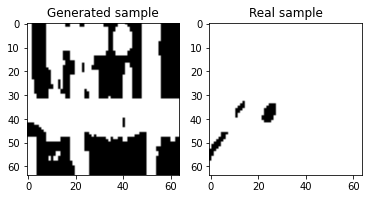

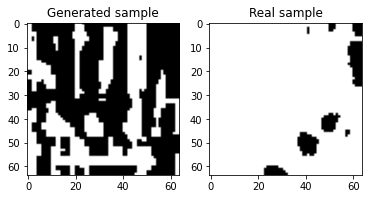

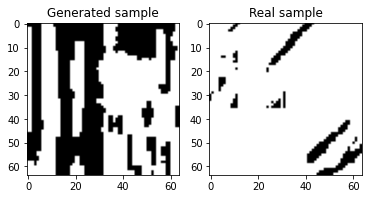

In [53]:
plot_res(1,1)
plot_res(8,52)
plot_res(3,63)

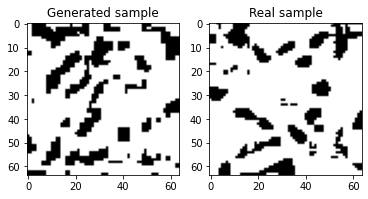

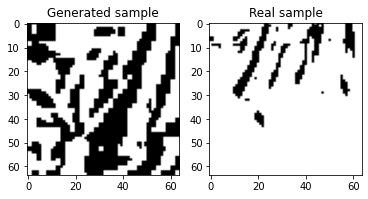

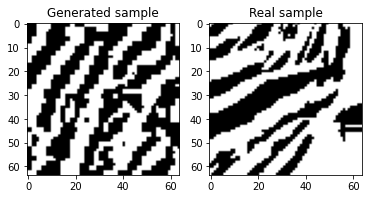

In [42]:
#central slices
plot_res(20,34)
plot_res(13,37)
plot_res(12,43)

In [43]:
def averaging_por_per_dim(data):
  avg_dim = []
  for i in range(0,28):
    a = data[i,:].mean()
    avg_dim.append(a)
  return np.array(avg_dim)
avg1dim = averaging_por_per_dim(por_general_1dim)
avg2dim = averaging_por_per_dim(por_general_2dim)
avg3dim = averaging_por_per_dim(por_general_3dim)

avg_test_1dim = averaging_por_per_dim(por_test_1dim) 
avg_test_2dim = averaging_por_per_dim(por_test_2dim)
avg_test_3dim = averaging_por_per_dim(por_test_3dim)  


In [ ]:

data = np.hstack((avg1dim,avg2dim,avg3dim)).reshape(-1)
data_test = np.hstack((avg_test_1dim,avg_test_2dim,avg_test_3dim)).reshape(-1)

#data = np.hstack((por_general_1dim,por_general_2dim,por_general_3dim)).reshape(-1)
#data_test = np.hstack((por_test_1dim,por_test_2dim,por_test_3dim)).reshape(-1)

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(5,6))
sns.boxplot(data=data,ax=axes[0]).set(
    xlabel='Real data', 
    ylabel='Porosity'
)
sns.boxplot(data=data_test,ax=axes[1],color='r').set(
    xlabel='Synthesised'
)
fig.tight_layout()

# Minkowski functionals calculation

In [840]:

# porosity calculation
def thresholding(arr,min_thresh=100,max_thresh=255):
    for i in range(0,len(dataset_test)):

      for j in range(0,len(dataset_test[0])):
          ret,arr[i][j,:,:] = cv2.threshold(arr[i][j,:,:],min_thresh,max_thresh,cv2.THRESH_BINARY_INV)
          ret,arr[i][:,j,:] = cv2.threshold(arr[i][:,j,:],min_thresh,max_thresh,cv2.THRESH_BINARY_INV)
          ret,arr[i][:,:,j] = cv2.threshold(arr[i][:,:,j],min_thresh,max_thresh,cv2.THRESH_BINARY_INV)   
   # ret,arr = cv2.threshold(arr,min_thresh,max_thresh,cv2.THRESH_BINARY_INV)

    return arr


In [841]:
#dataset_test_bin1 = thresholding(dataset_test,min_thresh=115)

In [842]:
#res_numpy_bin1 = thresholding(res_numpy,min_thresh=108)

In [843]:
#minkowski.functions_close(res_numpy[25][40,:,:])

In [844]:
def minkowski_func_calc(dataset):
  surface_area = []
  circumference = []
  Euler_characteristic = []
  for i in range(1,len(dataset)):
    minkows = minkowski.functions_open(dataset[i][:,:,:])
    surface_area.append(minkows[1].sum())
    circumference.append(minkows[2].sum())
    Euler_characteristic.append(minkows[3].sum())

  return np.array(surface_area),np.array(circumference), np.array(Euler_characteristic)



In [846]:
surface_area_gan, circum_gan, euler_gan = minkowski_func_calc(res_numpy)

In [847]:
surface_area, circum, euler = minkowski_func_calc(dataset_test)

[Text(0.5, 0, 'Synthesised')]

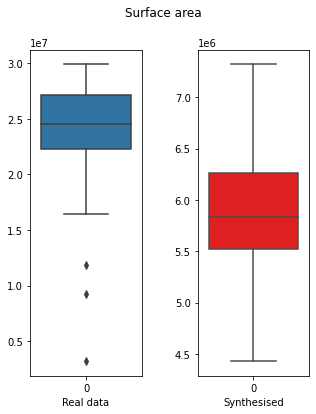

In [848]:
fig,axes = plt.subplots(1,2,figsize=(5,6))
fig.suptitle('Surface area ')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
sns.boxplot(data=surface_area,ax=axes[0]).set(
    xlabel='Real data', 
 #   ylabel='Surface area'
)
sns.boxplot(data=surface_area_gan,ax=axes[1],color='r').set(
    xlabel='Synthesised'
)

[Text(0.5, 0, 'Synthesised')]

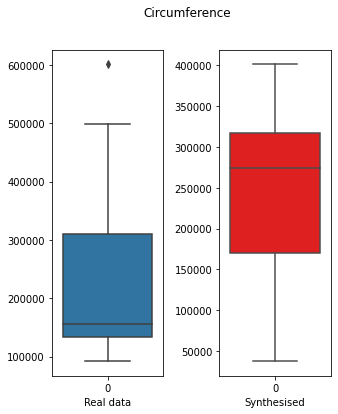

In [849]:
fig,axes = plt.subplots(1,2,figsize=(5,6))
fig.suptitle('Circumference')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
sns.boxplot(data=circum,ax=axes[0]).set(
    xlabel='Real data', 
    #ylabel='Porosity'
)
sns.boxplot(data=circum_gan,ax=axes[1],color='r').set(
    xlabel='Synthesised'
)

[Text(0.5, 0, 'Synthesised')]

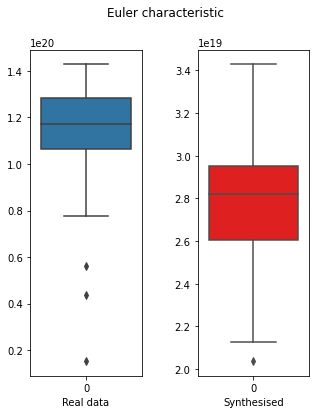

In [850]:
fig,axes = plt.subplots(1,2,figsize=(5,6))
fig.suptitle('Euler characteristic')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
sns.boxplot(data=euler,ax=axes[0]).set(
    xlabel='Real data', 
 #   ylabel='Porosity'
)
sns.boxplot(data=euler_gan,ax=axes[1],color='r').set(
    xlabel='Synthesised'
)


# Permeability calculation

In [ ]:
import porespy as ps
import openpnm as op

In [160]:
### Расчет проницаемости по направлению Z

def get_permeability_left_right(im, resolutios=1, sizes):
    # Проверка размеров модели
    if len(sizes) == 1:
        y_size = sizes[0]
        x_size = sizes[0]
        z_size = sizes[0]
    else:
        y_size = sizes[0]
        x_size = sizes[1]
        z_size = sizes[2]
    
    ### 1. Достаем сеть из 3D модели
    net = ps.networks.snow2(
    #    im=img3d,
       phases= im,
        voxel_size = 1, # 20nm
      #  boundary_faces=["top", "bottom", "front", "back", "left", "right"]
    )
    ### 2. Импортируем сеть и получем связи модели и ее геометрию
    pn, geo = op.io.PoreSpy.load(net)
    ### 3. Проверка связей модели 
    h = pn.check_network_health()
    ### 4. Удаляем закрытые поры
    op.topotools.trim(network=pn, pores=h['trim_pores'])
    h = pn.check_network_health()
    
    if len(pn["pore.left"][pn["pore.left"] == True]) == 0 or len(pn["pore.right"][pn["pore.right"] == True]) == 0:
        return 0
    
    ### 5. Подписываем среду для опытов 
    air = op.phases.Air(network=pn)
    ### 6. Задаем физику среды
    phys_air = op.physics.GenericPhysics(network=pn, phase=air, geometry=geo)
    ### 7. Назначаем физику соединений
    model = op.models.physics.hydraulic_conductance.hagen_poiseuille
    ### 8. Добаваляем физику в модель
    phys_air.add_model(propname='throat.hydraulic_conductance',
                       model=model,
                       pore_viscosity='pore.viscosity',
                       pore_area='pore.area',
                       throat_area='throat.area',
                       conduit_lengths='throat.conduit_lengths')
    
    ### 9. Задаем алгоритм течения и граничные условия
    perm = op.algorithms.StokesFlow(network=pn)
    perm.setup(phase=air)
    perm.set_value_BC(pores=pn.pores('left'), values=20)
    perm.set_value_BC(pores=pn.pores('right'), values=0)
    perm.run()
    ### 10. Производим расчет проницаемости
    Q = perm.rate(pores=pn.pores('left'), mode='group')[0] # m3/s
    A = (y_size * x_size) * resolution**2 # m2
    L = z_size * resolution # m
    mu = air['pore.viscosity'].max() # kg/(m*s)
    delta_P = 20 # Pa
    K = Q * L * mu / (A * delta_P) # m2
    
    K = K / 0.987e-12 * 1000  # mDarcy
    
    return K

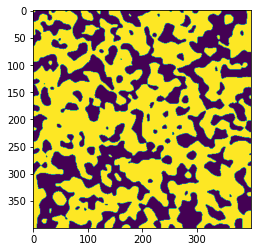

In [501]:
im = ps.generators.blobs(shape=[400, 400], porosity=0.6, blobiness=2)
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(im)

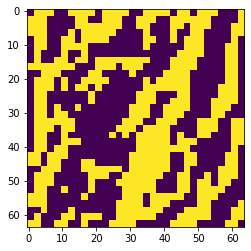

In [458]:
im = np.array(thresh1,dtype=bool)
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(im)

In [535]:
test = np.array(dataset_test_bin[21],dtype=bool)

In [540]:
net = ps.networks.snow(test,voxel_size=1,boundary_faces=["top", "bottom", "front", "back", "left", "right"])

AttributeError: ignored

In [537]:
try:
    pn,geo = op.io.PoreSpy.import_data(net.network)
except AttributeError:
    pn,geo = op.io.from_porespy(net.network)

In [527]:
h = pn.check_network_health()
    ### 4. Удаляем закрытые поры
op.topotools.trim(network=pn, pores=h['trim_pores'])
h = pn.check_network_health()

In [ ]:
op.network.Cubic()

In [520]:
pn = op.network.Cubic(shape=[100, 100, 1])
geo = op.geometry.StickAndBall(network=pn, pores=pn.Ps, throats=pn.Ts)
air = op.phases.Air(network=pn)
water = op.phases.Water(network=pn)
phys = op.physics.Standard(network=pn, phase=air, geometry=geo)
phys_water = op.physics.Standard(network=pn, phase=water, geometry=geo)

------------------------------------------------------------
CRITICAL   : front and back labels have been switched to obey the right-hand rule 
SOURCE     : openpnm.network.Cubic.__init__ 
TIME STAMP : 2022-05-24 10:32:07,348
------------------------------------------------------------


In [521]:
ip = op.algorithms.InvasionPercolation(network=pn)
ip.setup(phase=air)
ip.set_inlets(pores=pn.pores(['left']))
ip.run()

In [522]:
st = op.algorithms.StokesFlow(network=pn)
st.setup(phase=water)
st.set_value_BC(pores=pn.pores('front'), values=1)
st.set_value_BC(pores=pn.pores('back'), values=0)

In [523]:
st.run()
Qmax = st.rate(pores=pn.pores('front'))
print(Qmax)

[0.04642892]


In [478]:
 ### 5. Подписываем среду для опытов 
air = op.phases.Air(network=pn)

water = op.phases.Water(network=pn)
phys_water = op.physics.Standard(network=pn, phase=water, geometry=geo)
    ### 6. Задаем физику среды
phys_air = op.physics.Standard(network=pn, phase=air, geometry=geo)
    ### 7. Назначаем физику соединений
model = op.models.physics.hydraulic_conductance.hagen_poiseuille
    ### 8. Добаваляем физику в модель
phys_air.add_model(propname='throat.hydraulic_conductance',
                       model=model,
                       pore_viscosity='pore.viscosity',
                       pore_area='pore.area',
                       throat_area='throat.area',
                       conduit_lengths='throat.conduit_lengths')
    
    ### 9. Задаем алгоритм течения и граничные условия
perm = op.algorithms.StokesFlow(network=pn)
perm.setup(phase=air)
perm.set_value_BC(pores=pn.pores('left'), values=20)
perm.set_value_BC(pores=pn.pores('right'), values=0)
perm.run()

------------------------------------------------------------
ERROR      : throat.flow_shape_factors was not run since the following property is
             missing: 'pore.area' 
SOURCE     : openpnm.core.ModelsMixin._regen 
TIME STAMP : 2022-05-24 10:20:43,434
------------------------------------------------------------
------------------------------------------------------------
ERROR      : throat.hydraulic_conductance was not run since the following property is
             missing: 'pore.area' 
SOURCE     : openpnm.core.ModelsMixin._regen 
TIME STAMP : 2022-05-24 10:20:43,440
------------------------------------------------------------
------------------------------------------------------------
ERROR      : throat.poisson_shape_factors was not run since the following property is
             missing: 'pore.area' 
SOURCE     : openpnm.core.ModelsMixin._regen 
TIME STAMP : 2022-05-24 10:20:43,448
------------------------------------------------------------
-------------------------

KeyError: ignored